<a href="https://colab.research.google.com/github/danbm94/BADS-assignment20/blob/master/badsfinalassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Analytics and Data Science Final Project
## Daniel Bustillo Mac Lean
## Student ID: 609728
## e-mail: danbustillo94@gmail.com


# Introduction
The purpose of this modelling task is to firstly analyze the different reasons why a customer might return a product bought from an online retailer. Product returns in E-Commerce are significantly higher than physical shops, and the costs they incurr, be it shipping, free returns, labels and packaging([Invesp](https://www.invespcro.com/blog/ecommerce-product-return-rate-statistics/)).

In this report, we have data of purchases of a German online retailer that contain several characteristics of the product and whether the product was returned or not. Our first task would be to get a first look at the data and the different characteristics of the clothing items that were bought and try to find patterns and causes of why a product is not kept. Do customers buy in bulk to see if they like the items once they wear them? Do they buy the same product in different colors? Perhaps they buy these items and when the product arrive they don't fit. We attempt to answer these questions based on the large set of data we have available. Ideally, with the predictions of our model, customers that are about to buy an item that is likely to be returned, would get a  warning message noticing them that for said product there is a shipping fee of €3 plus 10% of the item value in loss of resale value.

Secondly, based on the different criteria that might determine if a customer returns an item, we define a list of features that we derive (or engineer) from the data that might have the most explaining power. This section of the report would be the most important, as feature engineering could give us the edge in predicting if an item might be returned.

Next, having defined the variables that go into our model, we define a machine learning algorithm that takes this information as input and processes it. Nowadays, there are plenty of algorithms and models that yield very good results in different situations and settings. The choice of a model and its parameter tuning is also key in getting good predictions, so it makes sense to compare different approaches and perhaps combining them. 

Finally, we evaluate the results from our model, get predictions for unknown data and calculate the accuracy of our model. With this information, we can calculate the cost sensitivity of the predictions we made. Customers that were likely to keep a product but they receive the warning and therefore refrain from buying a product(False Positives) and customers that are likely to return a product are labelled as customers that keep the items cause revenue loss to the retailer. As Data Scientists, it is our job to analyze the data, model it and bring the most accurate predictions to the firm, in order to avoid these costs for the firm.

### Load and read the dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#BADS Assignment WS20/21

#First import all necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)
kagglepath='/kaggle/input/bads2021/'

In [3]:
#df_known= pd.read_csv(kagglepath+'BADS_WS2021_known.csv', index_col='order_item_id')
#df_unknown= pd.read_csv(kagglepath+'BADS_WS2021_unknown.csv', index_col="order_item_id")

In [4]:
#Setting the working directory to a google drive folder
from google.colab import drive
drive.mount('/content/gdrive')
!pwd
%cd /content/gdrive/My Drive/BADS


Mounted at /content/gdrive
/content
/content/gdrive/My Drive/BADS


In [254]:
df_known= pd.read_csv('BADS_WS2021_known.csv', index_col='order_item_id')
df_unknown= pd.read_csv('BADS_WS2021_unknown.csv', index_col="order_item_id")

# Exploratory Data Analysis


## Train data

In this section, we proceed to analyze both datasets in order to get meaningful information about each variable and understand their relationship with each other and the target variable.

In [6]:
#Get a first look of the data
df_known.describe(include='all',datetime_is_numeric=True)

order_date delivery_date  ...  user_reg_date         return
count       100000         90682  ...         100000  100000.000000
unique          82           123  ...            573            NaN
top     2016-06-27    2016-07-03  ...     2015-02-17            NaN
freq          5577          5061  ...          33966            NaN
mean           NaN           NaN  ...            NaN       0.458180
std            NaN           NaN  ...            NaN       0.498251
min            NaN           NaN  ...            NaN       0.000000
25%            NaN           NaN  ...            NaN       0.000000
50%            NaN           NaN  ...            NaN       0.000000
75%            NaN           NaN  ...            NaN       1.000000
max            NaN           NaN  ...            NaN       1.000000

[11 rows x 13 columns]

In [7]:
df_known

order_date delivery_date  ...  user_reg_date return
order_item_id                            ...                      
1              2016-06-22    2016-06-27  ...     2016-06-23      0
2              2016-06-22           NaN  ...     2016-06-23      0
3              2016-06-22    2016-06-27  ...     2015-03-15      1
4              2016-06-22    2016-06-27  ...     2015-03-15      0
5              2016-06-22    2016-06-27  ...     2015-03-15      1
...                   ...           ...  ...            ...    ...
99996          2016-09-11    2016-09-12  ...     2015-02-17      0
99997          2016-09-11    2016-09-12  ...     2015-02-17      0
99998          2016-09-11    1994-12-31  ...     2016-09-10      0
99999          2016-09-11    1994-12-31  ...     2016-09-10      0
100000         2016-09-11    2016-10-08  ...     2015-02-17      0

[100000 rows x 13 columns]

Only from looking at the description of each variable and their summary statistics, we can gain a lot of insight on what could be the driving factor of returning a product.
The variables *order date* and *delivery date* show the dates when the customers ordered and received (if they even received) the clothing article. One interesting finding in the *delivery date* variable is that there are some data points where it seems that the client received the article 22 years before even ordering! (This is of course an error and it will be dealt with properly in the following section). The variables *item id* , *item size*, *item color* and *brand id* contain the most important attributes for the products that were ordered. Most likely they will encapsule great explaining power for our target variable. Looking at the business problem more generally, one would think that the size and color of an article that was ordered online would be the two biggest reasons why someone return a clothing article.


In [8]:
df_known.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_date     100000 non-null  object 
 1   delivery_date  90682 non-null   object 
 2   item_id        100000 non-null  int64  
 3   item_size      100000 non-null  object 
 4   item_color     100000 non-null  object 
 5   brand_id       100000 non-null  int64  
 6   item_price     100000 non-null  float64
 7   user_id        100000 non-null  int64  
 8   user_title     100000 non-null  object 
 9   user_dob       91275 non-null   object 
 10  user_state     100000 non-null  object 
 11  user_reg_date  100000 non-null  object 
 12  return         100000 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 10.7+ MB


In [255]:
#Select the categorical variables
categorical= ['item_id','item_size','item_color','brand_id','user_id','user_title','user_state']

#Select the variables that are dates
dates= ['order_date','delivery_date','user_dob','user_reg_date']

In [256]:
def convert_to_cat(df,catvars):
    df[catvars] = df[catvars].astype('category')
    print("done")
   



In [257]:
def convert_to_date(df,datevars):
    df[datevars]=df[datevars].apply(lambda x: pd.to_datetime(x,infer_datetime_format=True, errors='coerce'))
    print("done")
  

In [258]:
convert_to_cat(df_known,categorical)
convert_to_cat(df_unknown,categorical)
#Also change Target variable to bool
#df_known['return'] = df_known['return'].astype("bool")

done
done


In [259]:

convert_to_date(df_known,dates)
convert_to_date(df_unknown,dates)

done
done


In [14]:
df_known.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_date     100000 non-null  datetime64[ns]
 1   delivery_date  90682 non-null   datetime64[ns]
 2   item_id        100000 non-null  category      
 3   item_size      100000 non-null  category      
 4   item_color     100000 non-null  category      
 5   brand_id       100000 non-null  category      
 6   item_price     100000 non-null  float64       
 7   user_id        100000 non-null  category      
 8   user_title     100000 non-null  category      
 9   user_dob       91275 non-null   datetime64[ns]
 10  user_state     100000 non-null  category      
 11  user_reg_date  100000 non-null  datetime64[ns]
 12  return         100000 non-null  int64         
dtypes: category(7), datetime64[ns](4), float64(1), int64(1)
memory usage: 7.2 MB


### Target variable
Our most important variable would be of course the *return* variable. This variable indicates whether a customer returns a product or not and it is already encoded as a boolean variable (*True* if the the product is returned and *False* if the product is kept). In this dataset, the ratio between True and False values in the *return* variable is around 50%. 

In [15]:
df_known['return'].value_counts()

0    54182
1    45818
Name: return, dtype: int64

### Check for missing values

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df_known.isna())
print("There are {} missing values in the training data.".format( df_known.isnull().sum().sum()))

There are 18043 missing values in the training data.
Error in callback <function flush_figures at 0x7fedc22f53b0> (for post_execute):


KeyboardInterrupt: ignored

### Item price

Here we treat the variable *item price*, it would be logical to think that the price of an item would be an important factor for returning a product. Below we can see the summary statistics and a distribution plot for the variable. The average price of a product is €65, median price is 49.90 and the most expensive item costs almost €1000, whereas only 4 people ordered this item, so it will be dealt with properly in the next section.

In [17]:
df_known['item_price'].describe()

count    100000.000000
mean         65.064695
std          47.991546
min           0.000000
25%          29.900000
50%          49.900000
75%          79.900000
max         999.000000
Name: item_price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


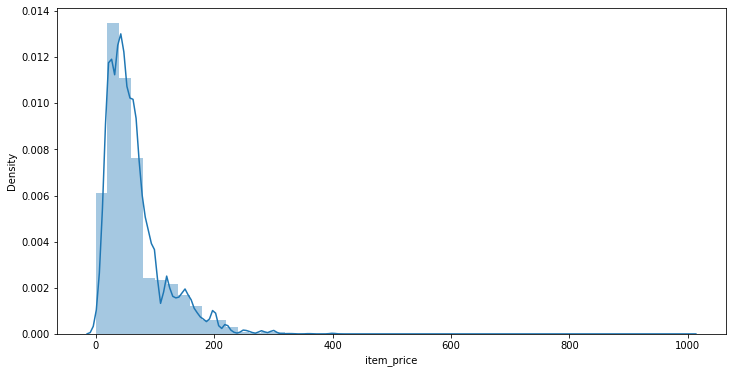

In [18]:
sns.distplot(df_known['item_price'])

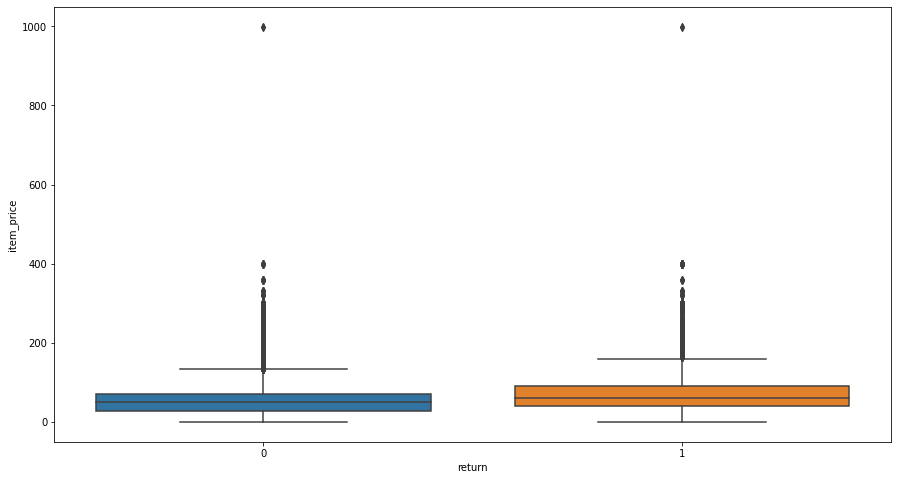

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_known['return'],y=df_known['item_price'])

As we can see, the items that are returned tend to me slightly more pricey than the ones that are kept.

### Item color
Moving on, the item color would be a priori one of the biggest reasons why someone would want to return a clothing article. Below we can see the top product colors bought. Unsurprisingly, the most bought item color is black, followed by blue, brown, grey and red, though further down the list there are some very specific colors like basalt, eccru, hibiscus, and some other I've never heard off.

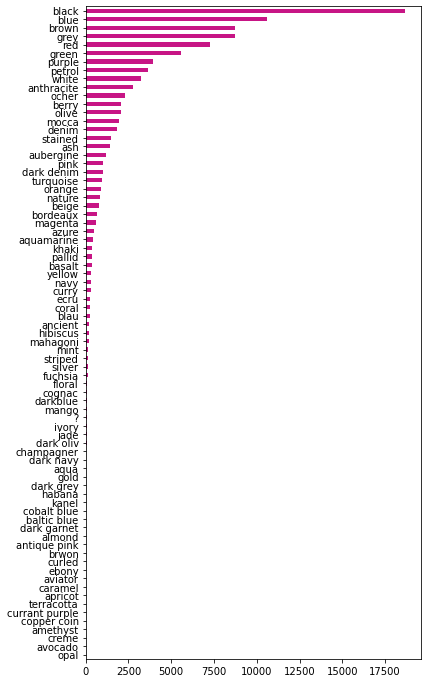

In [20]:
df_known['item_color'].value_counts(ascending=True).plot.barh(
    figsize=(6, 12),
    color='mediumvioletred'
)

### Item Size
The next item that might be a game changer for our model, item size, most people would return a product that doesn't fit them, so this variable might be of use.

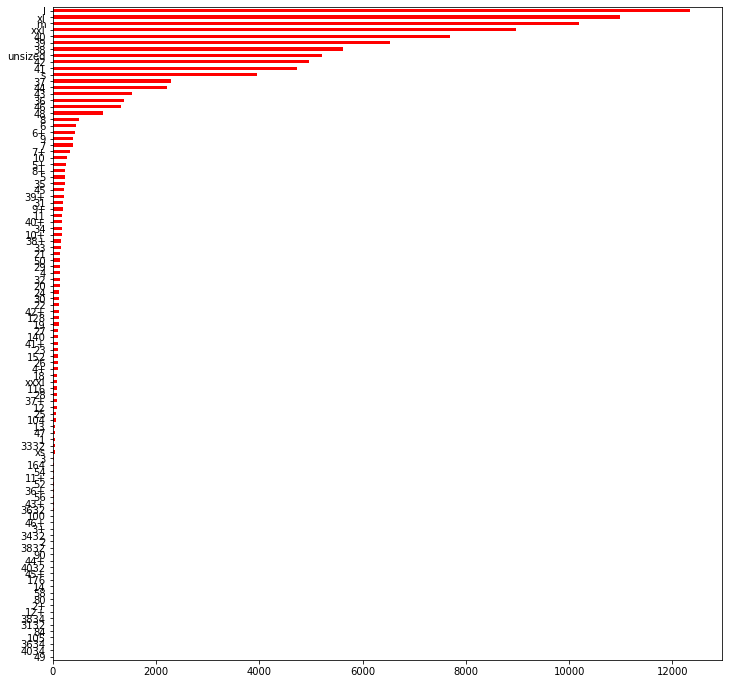

In [21]:
df_known['item_size'].value_counts(ascending=True).plot.barh(figsize=(12,12), color="red")

### User state

In [22]:
user_states= pd.crosstab(df_known['user_state'], df_known['return'], margins= True)
user_states['return_ratio']=0
user_states["return_ratio"]= (user_states[1]/user_states['All'])*100
user_states

return                             0      1     All  return_ratio
user_state                                                       
Baden-Wuerttemberg              6523   5458   11981     45.555463
Bavaria                         7280   6392   13672     46.752487
Berlin                          2201   1892    4093     46.225263
Brandenburg                     1201   1030    2231     46.167638
Bremen                           734    524    1258     41.653418
Hamburg                         1431   1104    2535     43.550296
Hesse                           4100   3486    7586     45.953071
Lower Saxony                    8110   7039   15149     46.465113
Mecklenburg-Western Pomerania    855    785    1640     47.865854
North Rhine-Westphalia         12621  10204   22825     44.705367
Rhineland-Palatinate            2596   2188    4784     45.735786
Saarland                         484    412     896     45.982143
Saxony                          1647   1500    3147     47.664442
Saxony-Anhalt                    606    516    1122     45.989305
Schleswig-Holstein              2929   2602    5531     47.043934
Thuringia                        864    686    1550     44.258065
All                            54182  45818  100000     45.818000

Just seeing the relationship of each federal State and the target variable, we can conclude that every state shows a similar return ratio (between 41% to 47%), thus reducing the validity of the variable in the final prediction.

In [23]:
pd.crosstab(df_known['item_id'],df_known['user_id'])

KeyboardInterrupt: ignored

## Test data


In [ ]:
df_unknown.describe(include='all',datetime_is_numeric=True)

In [ ]:
df_unknown.info()

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_unknown.isna())
print("There are {} missing values in the test data.".format( df_unknown.isnull().sum().sum()))

## Report
While this is not relevant for the modelling task, this resource gives the reader a nice overview of the datasets. This automised step of EDA is shown as an extra to further evaluate the variables in our dataset, it also gives nice visualization of each variable based on its datatype. Furthermore, multivariate analysis of numerical variables, for example correlation is also offered. This is a nice tool to automise the Exploratory Data Analysis step in the Data Science pipeline.

In [ ]:
!pip install pandas-profiling[notebook]

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df_known, title='Pandas Profiling Report')

TypeError: ignored

In [ ]:
profile.to_notebook_iframe()

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
profile2 = ProfileReport(df_unknown, title='Pandas Profiling Report')


In [ ]:
profile2= ProfileReport(df_unknown)

TypeError: ignored

# Feature engineering
In this section we consider all possible variables that could be fed into our model. This step in the pipeline is the most important one, as the defined variables, how they behave with the target variable, and how are they modelled, could prove to be the game changers in the performance of the preditive model. 

In the following steps, we proceed to create functions that apply some changes to different variables, in order to create, modify, and reduce the existing variables.

### Categorical variables (Item size, color, brands)

In [24]:
def cut_colors(df,number=int, replace_by=str):
  colors= df['item_color'].value_counts()
  col=colors.tail(number).index.tolist()
  df['item_color']=df['item_color'].astype('object')
  df['item_color']=df['item_color'].where(~df['item_color'].isin(col),replace_by)
  df['item_color']=df['item_color'].astype('category')
  del colors, col

In [163]:
cut_colors(df_known, 30, "other")
cut_colors(df_unknown, 30, "other")

In [26]:
def cut_sizes(df,number=int, replace_by=str):
  df['item_size']=df['item_size'].str.lower()
  sizes=df['item_size'].value_counts()
  size=sizes.tail(number).index.tolist()
  df['item_size']=df['item_size'].astype('object')
  df['item_size']=df['item_size'].where(~df['item_size'].isin(size),replace_by)
  df['item_size']=df['item_size'].astype('category')
  del sizes, size

In [164]:
cut_sizes(df_known,30, "other")
cut_sizes(df_unknown,30, "other")

In [28]:
def cut_brands(df, number=int, replace_by=int):
  brands=df_known['brand_id'].value_counts(ascending=False)
  cutoff=brands.tail(number).index.tolist()
  df['brand_id']=df['brand_id'].astype(int)
  df['brand_id']= df['brand_id'].where(~df['brand_id'].isin(cutoff),replace_by)
  df['brand_id']= df['brand_id'].astype('category')
  

In [260]:
def products_by_user(df):
  df['prod_by_user'] = df.groupby('user_id')['user_id'].transform('count')

In [261]:
products_by_user(df_known)
products_by_user(df_unknown)

### Delivery date
Here, there are some steps to be taken care before this variable can be of use.


In [262]:
#Here we create a function that creates the same feature for both dataset
def create_not_delivered(df):
    df['not_delivered']=df['delivery_date'].isna()
    df['not_delivered']= df['not_delivered'].astype(int)


In [263]:
create_not_delivered(df_known)
create_not_delivered(df_unknown)

In [264]:
def create_del_duration(df):
    df['del_duration'] = df['delivery_date']-df['order_date']
    df['del_duration'] = pd.to_numeric(df['del_duration'].dt.days, downcast='integer')
   

In [265]:
create_del_duration(df_known)
create_del_duration(df_unknown)

In [266]:
def remove_outliers_date(df):
    '''first subset the dates that are right, then, get the average duration from that subset.
    Afterwards, use the rounded mean value from that subset to replace the wrong dates'''
    test=df[df['delivery_date']>df['order_date']]
    avg=round(np.mean(test['del_duration']))
    df['del_duration']=df['del_duration'].where(df['del_duration']>0,avg)
    df['del_duration'].fillna(avg,inplace=True)
    print("This is the average delivery duration: {} days".format(avg))

In [267]:
remove_outliers_date(df_known)
remove_outliers_date(df_unknown)

This is the average delivery duration: 7 days
This is the average delivery duration: 9 days


We replace the invalid delivery dates by the average delivery duration(without the invalid dates), that means that all the invalid dates will be replaced by their *order date* value + average delivery duration (7 days in the training data and 9 days in the test data).


In [268]:
#Create new dummy variable: 1 if registration date is after order date, 0 if not
def is_reg_after(df):
    df['reg_after']=df['user_reg_date']-df['order_date']
    df['reg_after']=pd.to_numeric(df['reg_after'].dt.days,downcast='integer')
    df['reg_after']=df['reg_after'].where(df['reg_after']>0,0)
    

In [269]:
is_reg_after(df_known)
is_reg_after(df_unknown)

### Seasonality 
Now, we want to see if the time of the year can be an influential factor for returning a product, for this we extract the month of the *order date* variable and separate them into 4 different seasons by using the function:  $$month \bmod 12 // 3 +1$$ <br>
This yields a number between 1 and 4:
1. Winter (December, January, February)
2. Spring (March, April, May)
3. Summer (June, July, August)
4. Autumn (September, October, November)


In [270]:
def create_season(df):
    df['season'] = pd.DatetimeIndex(df['order_date']).month
    df['season']=df['season']%12//3+1 #Here we convert the months to 4 different seasons
    df['season']=df['season'].astype("category")
    print(df['season'].value_counts())

In [271]:
create_season(df_known)
create_season(df_unknown)


3    88952
4    11048
Name: season, dtype: int64
4    41762
1     8238
Name: season, dtype: int64


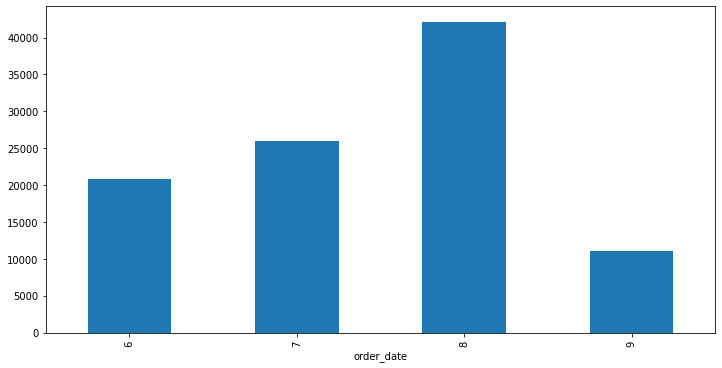

In [272]:
df_known['order_date'].groupby(df_known["order_date"].dt.month).count().plot(kind="bar")

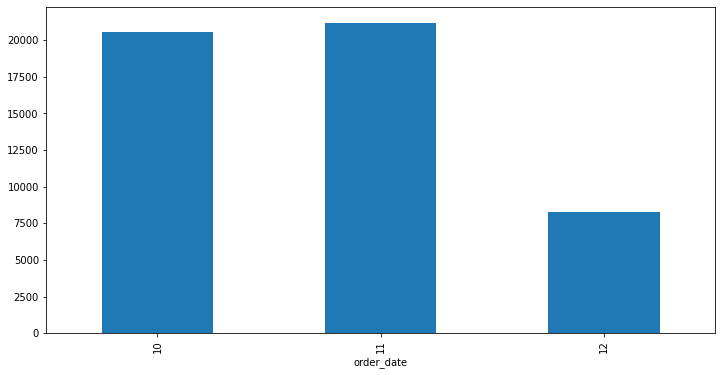

In [273]:
df_unknown['order_date'].groupby(df_unknown["order_date"].dt.month).count().plot(kind="bar")

As we can see, the training data shows data from Summer and Autumn  and the test data shows data from October to December (Autumn and Winter)

#### Day of the week

In [274]:
import datetime

def extract_weekday(df):
    df['weekday'] = df['order_date'].apply(lambda x: x.weekday())
    df['weekday'] = df['weekday'].astype("category")
    print(df['weekday'].value_counts().sort_index())




In [275]:
extract_weekday(df_known)
extract_weekday(df_unknown)

0    17431
1    13629
2    15373
3    12967
4    13735
5    13651
6    13214
Name: weekday, dtype: int64
0    8069
1    6114
2    6203
3    6411
4    7006
5    7525
6    8672
Name: weekday, dtype: int64


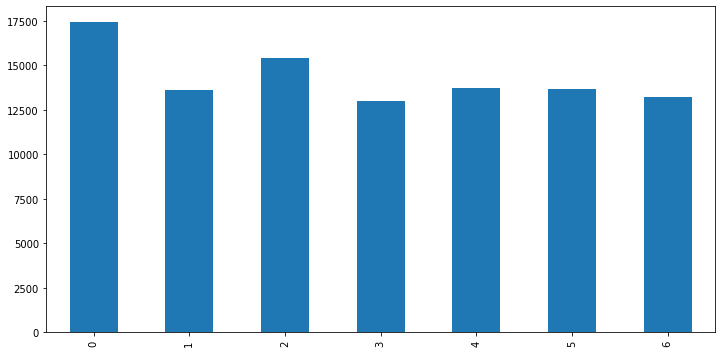

In [276]:
df_known['weekday'].value_counts().sort_index().plot.bar()

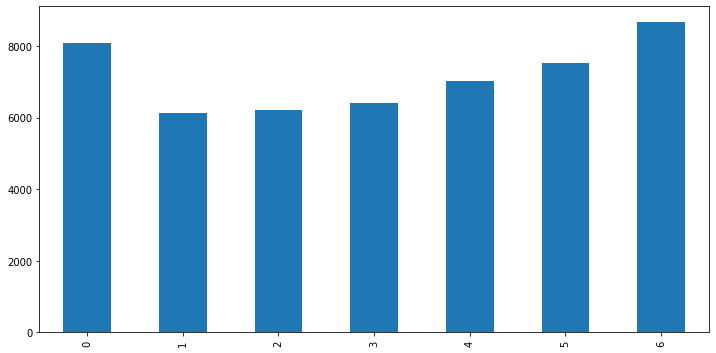

In [277]:
df_unknown['weekday'].value_counts().sort_index().plot.bar()

### Age of shopper

In [278]:
def age_dummy(df):
    df['age_unknown'] = df['user_dob'].isna()
    df['age_unknown'] = df['age_unknown'].astype(int)
    

In [279]:
age_dummy(df_known)
age_dummy(df_unknown)

In [280]:
def get_age(df):
    df['age']= (df['order_date']-df['user_dob'])/np.timedelta64(1, 'Y')
    median = df.loc[df['age']<80, 'age'].median()
    df.loc[df['age'] > 80, 'age'] = np.nan
    df['age'].fillna(median,inplace=True)
    df["age"] = np.where(df["age"] >80, median,df['age'])
    df["age"] = np.where(df["age"] <17, 17,df['age'])
    df['age'] =round(df['age']).astype(int)

In [281]:
get_age(df_known)
get_age(df_unknown)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



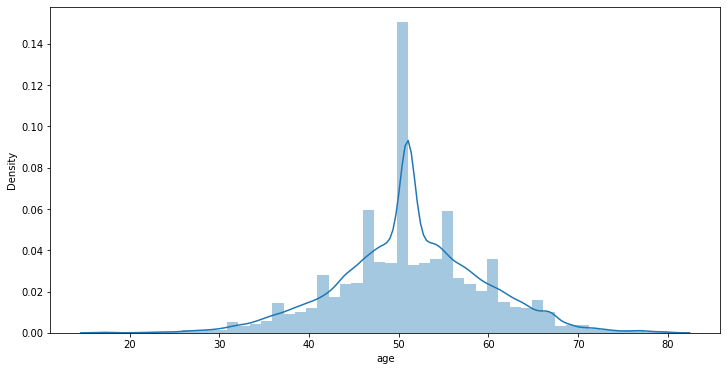

In [282]:
sns.distplot(df_known['age'])

In [283]:
def remove_price_outliers(df):
    median = df.loc[df['item_price']<400, 'item_price'].median()
    df.loc[df['item_price'] > 80, 'item_price'] = np.nan
    df['item_price'].fillna(median,inplace=True)
    df["item_price"] = np.where(df["item_price"] >400, median,df['item_price'])


In [284]:
remove_price_outliers(df_known)
remove_price_outliers(df_unknown)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



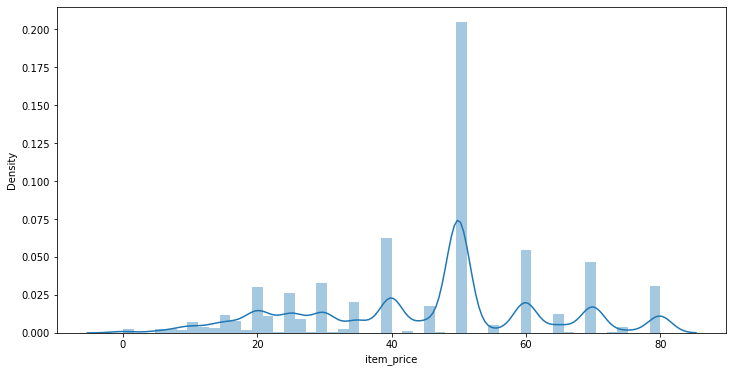

In [285]:
sns.distplot(df_known['item_price'])

## Multivariate Analysis

In [ ]:
corr=df_known.corr()
f,ax= plt.subplots(figsize=(18,25))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='1f')

# Modelling
In this section we proceeed to choose a machine learning algorithm and model for our case. Based on the dataset we have available, we can see that we have several categorical variables with high cardinality. Normally, for models like LOGIT or XGBoost, these variables might prove troublesome, as there is the need for One Hot Encoding or Weight of Evidence (WOE). Given that we have these variables with several categories, like item sizes, item colors, item IDs, user IDs, etc, there is one machine learning model that has great Categorical Features support. 

CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi ([CatBoost.ai](https://catboost.ai/)).

## Baseline models
Before diving deep into the modelling, it would be wise to compare our state of the art model to baseline models and take the accuracy of those baseline models as benchmark for our SOTA model's predictions.

Here we consider a simple logit regression and a simple decision tree classifier, we fit our models and compare their accuracy and use these results to compare the results of our more advanced model.

### Scaling
Here, we proceed to scale all our numerical variables so that the machine algorithm is fed numerical values that are somewhat set on a similar scale. 

Examples of what we want to avoid: Prices of €399.90 lie on the same scale as age or days of delivery

In [288]:
#Declare the X and y variables of the dataset
dum= df_known[["item_price","age_unknown","user_title","del_duration","not_delivered","reg_after","prod_by_user","season","weekday","age"]]
y= df_known['return'].astype(int)

In [191]:
X=pd.get_dummies(dum)

In [192]:

X_test = df_unknown[['item_price','user_title','del_duration','age_unknown','prod_by_user'
                    ,'not_delivered','reg_after','season','weekday','age']]

In [106]:
from sklearn.preprocessing import StandardScaler


In [193]:
numeric_cols = ["item_price","del_duration","prod_by_user","age"]

standard = StandardScaler()

X[numeric_cols] = standard.fit_transform(X[numeric_cols])

X_test[numeric_cols] = standard.transform(X_test[numeric_cols])

X_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



item_price user_title  del_duration  ...  season  weekday      age
order_item_id                                       ...                          
100001           1.395382        Mrs      6.236738  ...       4        5 -0.29259
100002           1.395382        Mrs      6.236738  ...       4        5 -0.29259
100003           1.395382        Mrs      6.236738  ...       4        5 -0.29259
100004           0.262523        Mrs      6.236738  ...       4        5 -0.29259
100005           0.828952        Mrs      6.236738  ...       4        5 -0.29259

[5 rows x 10 columns]

In [194]:
#Logit model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='l2', fit_intercept=True,max_iter=500)
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
#  CART tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=7)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [196]:
print('Logit model scores {:.4}'.format(logit.score(X, y)))
print('Tree model scores {:.4}'.format(tree.score(X, y)))

Logit model scores 0.6158
Tree model scores 0.6335


## Catboost algorithm

In [302]:
#Reassign X and y for CatBoost algorithm
X= df_known[["item_id","item_size","item_color","item_price","user_title","user_id","del_duration","age_unknown","brand_id","prod_by_user",
             "not_delivered","reg_after","season","weekday","age"]]

In [303]:

X_test = df_unknown[['item_id','item_size','item_color','item_price','user_title','user_id','del_duration',"age_unknown",'brand_id','prod_by_user'
                    ,'not_delivered','reg_after','season','weekday','age']]

Here we decide against scaling our numeric variables since it appears it decreases the accuracy of our model.

In [ ]:
#run the scaler again
#numeric_cols = ["item_price","del_duration","prod_by_user","age"]

#standard = StandardScaler()

#X[numeric_cols] = standard.fit_transform(X[numeric_cols])

#X_test[numeric_cols] = standard.transform(X_test[numeric_cols])

#X_test.head()

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install catboost
!pip install ipywidgets
!pip install optuna
!jupyter nbextension enable --py widgetsnbextension

In [59]:
from catboost import CatBoostClassifier,Pool
import optuna

In [289]:
#Declare categorical features
cat_feat= ['item_size',"item_color","user_title",'brand_id',"user_id","item_id","season","weekday"]

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [304]:
train_pool= Pool(X_train,y_train,cat_feat)
valid_pool= Pool(X_validation,y_validation, cat_feat)
X_pool= Pool(X,y, cat_feat)

In this section, we have tried several alternatives of models with different hyperparameters and combinations of features. We performed a simple Grid Search in order to get the best combination of hyperparameters. Nevertheless, the performance of CatBoost without hyperparameter tuning yields a very good result. 

Here we go for the following parameters: (see code cell below)

In [305]:
from catboost import cv

# parameters for training
params = {
    'loss_function': 'Logloss',
    'iterations': 1000,
    'custom_metric':['Logloss','AUC:hints=skip_train~false'],
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 7,
    'task_type':'CPU',
    'early_stopping_rounds':100

}


In [306]:
model = CatBoostClassifier(verbose=True,cat_features=cat_feat,**params)

In [ ]:
#Warning, this cell takes a lot of time to run, hyperparameters are already set
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

tuned_features={'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1}

grid_search_result = model.grid_search(grid, 
                                       X=X, 
                                       y=y,
                                       cv=5,
                                       plot=True)

In [307]:
model.fit(X,y,cat_features=cat_feat,verbose=10)

0:	learn: 0.6589532	total: 275ms	remaining: 4m 34s
10:	learn: 0.5809507	total: 1.96s	remaining: 2m 56s
20:	learn: 0.5670150	total: 3.85s	remaining: 2m 59s
30:	learn: 0.5582631	total: 5.84s	remaining: 3m 2s
40:	learn: 0.5521548	total: 8.13s	remaining: 3m 10s
50:	learn: 0.5474974	total: 10.2s	remaining: 3m 9s
60:	learn: 0.5441549	total: 12.3s	remaining: 3m 9s
70:	learn: 0.5425147	total: 14.5s	remaining: 3m 10s
80:	learn: 0.5410734	total: 16.8s	remaining: 3m 11s
90:	learn: 0.5399100	total: 18.7s	remaining: 3m 7s
100:	learn: 0.5391507	total: 20.9s	remaining: 3m 6s
110:	learn: 0.5380468	total: 23.2s	remaining: 3m 5s
120:	learn: 0.5372406	total: 25.3s	remaining: 3m 3s
130:	learn: 0.5361727	total: 27.7s	remaining: 3m 3s
140:	learn: 0.5351402	total: 29.9s	remaining: 3m 2s
150:	learn: 0.5342365	total: 32.1s	remaining: 3m
160:	learn: 0.5335684	total: 34.1s	remaining: 2m 57s
170:	learn: 0.5325887	total: 36.3s	remaining: 2m 56s
180:	learn: 0.5319502	total: 38.4s	remaining: 2m 53s
190:	learn: 0.531

In [310]:
#save the tuned model
model.save_model("catboost_model_final",format='cbm')

In [311]:
model.get_best_score() # Best model

{'learn': {'AUC': 0.8247350848665527, 'Logloss': 0.5043588408241743}}

# Model Evaluation

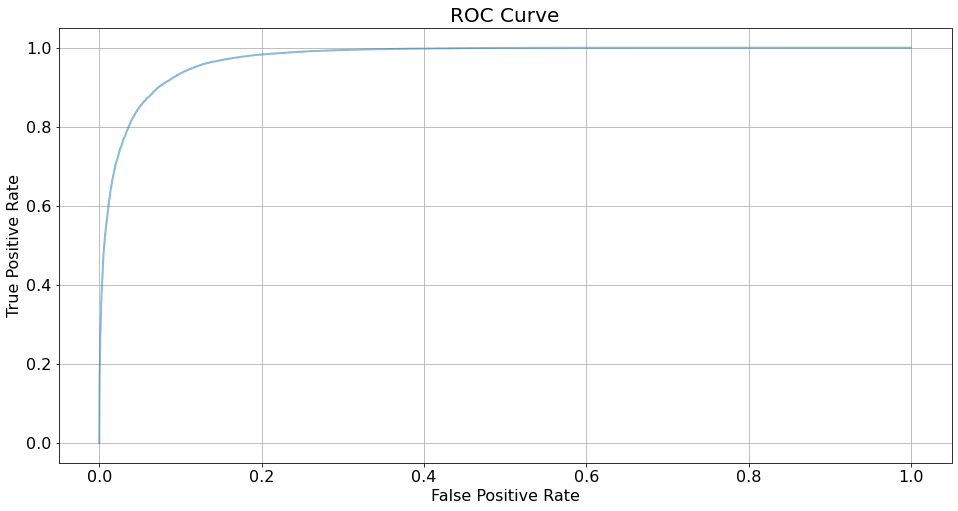

(array([0.        , 0.        , 0.        , ..., 0.99996309, 0.99998154,
        1.        ]),
 array([0.00000000e+00, 2.18254834e-05, 4.36509669e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.00000000e+00, 9.86725341e-01, 9.86270576e-01, ...,
        1.01016414e-04, 9.50109530e-05, 0.00000000e+00]))

In [295]:
#Roc Curve
from catboost.utils import get_roc_curve
get_roc_curve(model,X_pool,plot=True)

### Confusion matrix and cost sensitivity

Here we add the table


In [89]:
# Data analysis terms for each quadrant

pd.DataFrame({'actual_Keep(0)': ['TP', 'FN'], 'actual_Return(1)': ['FP', 'TN']}, index= ['predicted_Keep(0)', 'predicted_Return(1)'])

actual_Keep(0) actual_Return(1)
predicted_Keep(0)               TP               FP
predicted_Return(1)             FN               TN

In [91]:
# Cost matrix for our scenario

cost_matrix = pd.DataFrame({'actual_Keep(0)': ["0", "0.5*v"], 'actual_Return(1)': ["0.5 ⋅ 5 ⋅ −(3 + 0.1 ⋅ v)", "0"]}, index= ['predicted_Keep(0)', 'predicted_Return(1)'])
cost_matrix

actual_Keep(0)          actual_Return(1)
predicted_Keep(0)                0  0.5 ⋅ 5 ⋅ −(3 + 0.1 ⋅ v)
predicted_Return(1)          0.5*v                         0

In [328]:
from catboost.utils import get_confusion_matrix
cm = get_confusion_matrix(model,X_pool)
print(cm)

[[46650.  7532.]
 [ 2629. 43189.]]


In [329]:

# Bayes optimal threshold
threshold_bayes = (cm[1,0]               # C(return,Keep)
                   /(cm[1,0]             # C(return,Keep)
                     +cm[0,1])).round(5) # C(keep,Return)
threshold_bayes

0.25873

In [313]:
#Use Catboost model to predict
pred_proba = model.predict_proba(X)[:,1]
# Use the array above to manually determine the cut-off and convert to class predictions
pred_default = np.where(pred_proba >= 0.5, 1, 0) # 0.5 is the default cut-off, equivalant to y_pred from above
pred_bayes= np.where(pred_proba >= threshold_bayes, 1, 0) # Using the cut-off defined by the cost-minimal threshold function
print(np.mean(pred_default), np.mean(pred_bayes)) # Shows the percentage of observations that are now predicted with the label 1, default

0.50721 0.68539


Having calculated the Bayes optimal threshold, we compare the default cutoff versus the cutoff we just derived. As it's explained in the description of the task, the data is already artificially balanced, so we only proceeded to calculate this cost sensitivity.

In [331]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model using the default cutoff is: {}".format(accuracy_score(y, pred_default)))
print("The accuracy of the model using the cost-minimal cutoff is: {}".format(accuracy_score(y, pred_bayes)))

The accuracy of the model using the default cutoff is: 0.89839
The accuracy of the model using the cost-minimal cutoff is: 0.77127


# Apply model to test set and get prediction

In [132]:

X_test = df_unknown[['item_id','item_size','item_color','item_price','user_title','user_id','del_duration','brand_id','prod_by_user'
                    ,'not_delivered','reg_after','season','weekday','age']]

In [319]:
catpredict= model.predict_proba(X_test)[:,1]

In [320]:
predictions_final= np.where(catpredict >= threshold_bayes, 1, 0)

In [315]:
predictions = pd.Series(catpredict, index=df_unknown.index, name='return')

In [316]:
predictions

order_item_id
100001    0.465739
100002    0.500326
100003    0.526321
100004    0.397321
100005    0.300851
            ...   
149996    0.623592
149997    0.136231
149998    0.595351
149999    0.136231
150000    0.468078
Name: return, Length: 50000, dtype: float64

In [321]:
predictions_df=pd.Series(predictions_final, index=df_unknown.index, name='return')

In [332]:
predictions_df.to_csv('final_predictions.csv')

# Conclusion
Overall, what we can conclude of this modelling task is that the type of the data of the original dataset was not suitable for processing 'as is' into a machine learning model. A great deal of feature engineering has been necessary to create a model that yields a more than acceptable AUC score.

Luckily, with our choice of model, our work in the Feature Engineering section has been significantly reduced, as the Boosting algorithm CatBoost has an extremely useful catagorical feature support, which means that the model can be run with minimal data preprocessing on those variables. Still, as mentioned in the above parts, some categories with considerably lower value counts are dropped, which seem to improve our model's accuracy. This makes sense, as there are many items that at first sight are unique, for example: Avocado colored clothes, or baby clothes, or items that costs €999. 

Many Data Scientist emphasize that, as the models get better and better, new hyperparameter tuning algorithms and faster computational times become more common, most improvements will come from the data that we feed into them ([OpenDataScience](https://opendatascience.com/feature-engineering-david-epstein/)). In the last years, several libraries that automatize the feature engineering process have emerged (for example [FeatureTools](https://www.featuretools.com/)), but domain knowledge and common sense remain the true art of the profession.

Naturally, because this task will be evaluated by the impact of the costs of our model, we cannot assure the best performance without seeing the results, as it's the rule with real world data. we make predictions for the future, and perhaps some parts of this model can be put into production and evaluate in real time if a customer is likely to return a product or not. Nonetheless, having submitted predictions of the test set in Kaggle, which evaluates them and tests the predictions with the true values of the test set, we can confirm that this model (and some of the iterations of it) perform very good in the test set, with an AUC Score of 0.75692. 

The last part, which handles the cost sensitivity of the model, tries to calculate the Bayes optimal threshold for the cutoff. We then use this cutoff and evaluate both predictions without and with the cutoff to determine their relevance.

To conclude, this model has proven to be relatively accurate in terms of the AUC metric. It remains to be seen if the cost saving is also accurate in terms of the cost matrix. 

Naturally, this is in no way a perfect model, having spent the most time in the feature engineering part and having evaluated the different variables that are fed into our model, there can always be another feature that contains a lot of predictive power, as many other Data Scientists will most likely have proven. Nonetheless, in the end, the purpose of this task is to accurately predict a binary variable. How you do it, be it using the fanciest State of the Art Machine Learning algorithm, a Neural Network, or a simple logit regression, doesn't matter to the online retailer. The firm expects solid and reliable data from the Data Scientist, the rest is up to the modeller.

On that note, a not so small share of time has been spent on modelling, on trying different approaches and testing several models. As stated in the assignment description, this report then only shows the essential parts of the modelling. For example, the popular gradient boosting algorithm XGBoost was initially considered for the task, in the end, CatBoost proved to be more fitting for this particular task given the support on categorical variables. Additionally, state of the art hyperparameter tuning algorithm from Optuna was also considered but then discarded as it did not bring any significant improvement to the model.


# References
- https://www.invespcro.com/blog/ecommerce-product-return-rate-statistics/ (Accessed 29th April 2021)
- https://catboost.ai/
- https://opendatascience.com/feature-engineering-david-epstein/